# In-Situ data

*An in-situ data is the data collected that is associated with measurement has the exact measurement of the actual location. An example of this would be when collecting Remote sensing data, in-situ data will be used to verify that the measurement of the data collected will be the same as the actual location.*

In-Situ data are vector data (points or polygons) that give indications on the ground reality.
The precision of the data can vary:
- land cover
- crop type
- ...


Source : http://wiki.gis.com/wiki/index.php/In-situ_data

In [1]:
import os
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
from pathlib import Path

from IPython.display import Image
from IPython.display import display

print(f'Pandas    : {pd.__version__}')
print(f'GeoPandas : {gpd.__version__}')

Pandas    : 1.1.5
GeoPandas : 0.8.1


## Set directory

In [2]:
#computer_path = 'X:/'
computer_path = '/Volumes/nbdid-sst-lbrat2104/'
grp_letter    = 'X'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'


vector_path  = f'{computer_path}data/VECTOR/'

roi_path     = f'{work_path}ROI/'
in_situ_path = f'{work_path}IN_SITU/'

## Reading shapefile

With `GeoPandas` we can read a shapefile in a GeoDataFrame and apply many methods on it.
- **GeoSeries** : a vector where each entry in the vector is a set of shapes corresponding to one observation.
- **GeoDataFrame** : a tabular data structure that contains a GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like 'area' is called), this commands will always act on the “geometry” column. A GeoDataFrame is equivalent to the Attribute Table in QGIS + a geometry column (which is hidden in QGIS).


`GeoPandas` has three basic classes of geometric objects (which are actually `shapely` objects):
- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

In [3]:
vector_name = 'WALLONIA_2018_Cropland.shp'

vector_file = f'{vector_path}{vector_name}'

print(f'Reading the vector file : {vector_file}')

# Read the file "vector_file" using GeoPandas (gpd) into the GeoDataFrame "gdf"
gdf = gpd.read_file(vector_file)

# Display the 5 first rows of the GeoDataFrame
display(gdf.head())

# Get the Coordinates Reference System (CRS)
print(f'\n The Coordinates Reference System is {gdf.crs}')

Reading the vector file : /Volumes/nbdid-sst-lbrat2104/data/VECTOR/WALLONIA_2018_Cropland.shp


,ID,CROP,LC,CODE,IRRIGATION,geometry
0,1,1,Grassland (temporary),62,0,"POLYGON ((534958.317 5621580.609, 534963.783 5..."
1,2,1,Sugar beet,91,0,"POLYGON ((545783.879 5607562.806, 545784.147 5..."
2,3,1,Maize (for livestock),201,0,"POLYGON ((545590.560 5607777.241, 545619.713 5..."
3,4,1,Common wheat (winter),311,0,"POLYGON ((546029.943 5607654.334, 546025.553 5..."
4,5,1,Maize (for livestock),201,0,"POLYGON ((545993.255 5607595.831, 546028.753 5..."



 The Coordinates Reference System is epsg:32631


## Manipulation on in-situ dataset

### Open in-situ datasets (Wallonia 2018) and ROI in *GeoDataFrame*

- Cropland - SIGEC dataset
- Non-cropland - homemade dataset
- Region of Intrest created previously

In [4]:
roi_shp      = f'{roi_path}extent_roi_32631.shp'
cropland_shp = f'{vector_path}WALLONIA_2018_Cropland.shp'
non_crop_shp = f'{vector_path}WALLONIA_2018_Non_cropland.shp'

cropland_gdf = gpd.read_file(cropland_shp)
non_crop_gdf = gpd.read_file(non_crop_shp)
roi_gdf      = gpd.read_file(roi_shp)

### Select polygons within the ROI extent

1. Clip polygons with the ROI extent --> can potentially create "*multi-polygons*" geometries that will cause problems later on !
2. Select polygons within the ROI extent

**Warning** :

Both layers must be in the same Coordinate Reference System (CRS). The *gdf* will be clipped to the full extent of the clip object.

If there are multiple polygons in mask, data from *gdf* will be clipped to the total boundary of all polygons in mask.

In [5]:
# 1. Clip polygons to the ROI extent
# ----------------------------------

'''
non_crop_gdf = gpd.clip(non_crop_gdf, roi_gdf)
cropland_gdf = gpd.clip(cropland_gdf, roi_gdf)
'''

# 2. Select polygons within the ROI extent
# ----------------------------------------

# Get the geometry of the ROI

roi_geom = roi_gdf.geometry[0]

non_crop_gdf = non_crop_gdf[non_crop_gdf.within(roi_geom)]
cropland_gdf = cropland_gdf[cropland_gdf.within(roi_geom)]

### Merge both datasets into one

In [6]:
dataset_to_merge = [cropland_gdf, non_crop_gdf]

in_situ_gdf = pd.concat(dataset_to_merge, ignore_index=True)

### Write the new in-situ dataset into a shapefile

In [7]:
in_situ_file = f'{in_situ_path}WALLONIA_2018_IN_SITU_ROI.shp'

in_situ_gdf.to_file(in_situ_file)

display(in_situ_gdf)

,ID,CROP,LC,CODE,IRRIGATION,geometry
0,1877,1,Maize (for livestock),201,0,"POLYGON ((634719.076 5591248.019, 634788.109 5..."
1,1878,1,Common wheat (winter),311,0,"POLYGON ((634996.603 5591774.690, 635051.974 5..."
2,1879,1,Maize (for livestock),201,0,"POLYGON ((635196.857 5591331.590, 635199.724 5..."
3,1880,1,Grassland (temporary),62,0,"POLYGON ((635003.339 5591080.041, 635021.807 5..."
4,3251,1,Barley (winter),321,0,"POLYGON ((634708.850 5590509.262, 634710.400 5..."
...,...,...,...,...,...,...
325,183204,0,Not agriculture,20,0,"POLYGON Z ((634030.058 5595825.237 0.000, 6340..."
326,183206,0,Not agriculture,19,0,"POLYGON Z ((627815.480 5595734.706 0.000, 6278..."
327,183208,0,Not agriculture,19,0,"POLYGON Z ((628489.484 5595844.131 0.000, 6284..."
328,183210,0,Not agriculture,6,0,"POLYGON Z ((632038.546 5595956.541 0.000, 6320..."


## Plot vector data with `matplolib`

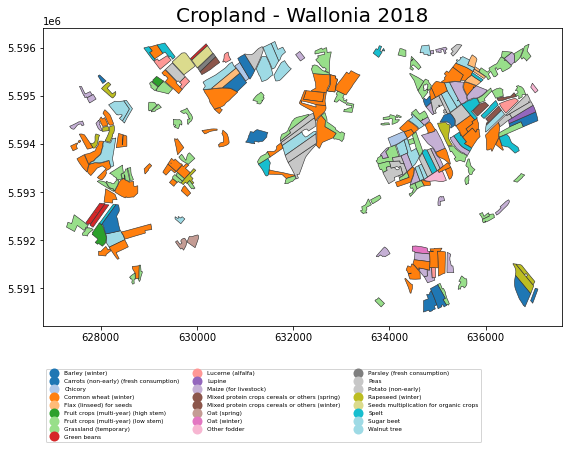

In [8]:
# Plot cropland from SIGEC
# ------------------------

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

cropland_gdf.plot(ax=ax, column='LC', categorical=True, cmap='tab20', linewidth=.6, edgecolor='0.2',
    legend=True, legend_kwds={'loc':'lower left','bbox_to_anchor':(0,-0.4), 'fontsize':'xx-small', 'ncol':3})

ax.set_title('Cropland - Wallonia 2018',fontsize=20)

plt.tight_layout()

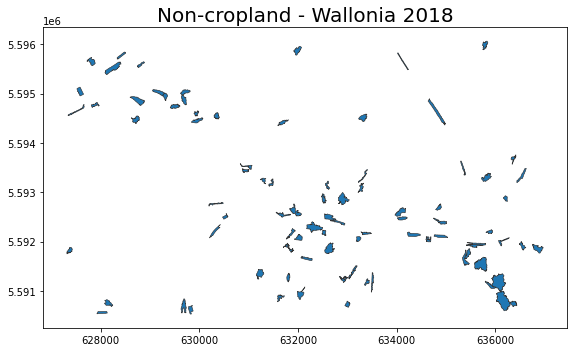

In [9]:
# Plot Non-croplands
# ------------------

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

non_crop_gdf.plot(ax=ax, column='LC', categorical=True, cmap='tab20', linewidth=.6, edgecolor='0.2')

ax.set_title('Non-cropland - Wallonia 2018',fontsize=20)

plt.tight_layout()

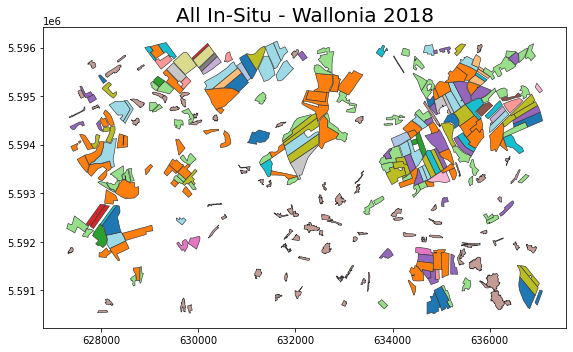

In [10]:
# Plot all in-situ
# ----------------

fig, ax = plt.subplots(1, 1, figsize=(10, 5))

in_situ_gdf.plot(ax=ax, column='LC', categorical=True, cmap='tab20', linewidth=.6, edgecolor='0.2', legend=False)

ax.set_title('All In-Situ - Wallonia 2018',fontsize=20)

plt.tight_layout()